[3 3 3 ... 2 2 2]
Initializing Neural Network Parameters ...


Cost at (fixed) debugging parameters (w/ lambda = 3.000000): 4.782204 
(for lambda = 3, this value should be about 0.576051)


C:\Users\maart\AppData\Local\Temp\ipykernel_8228\1741061116.py:201: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction, initial_nn_params, jac=True, method='TNC', options=options)


Training Set Accuracy: 34.430132


ValueError: cannot reshape array of size 57601 into shape (240,240)

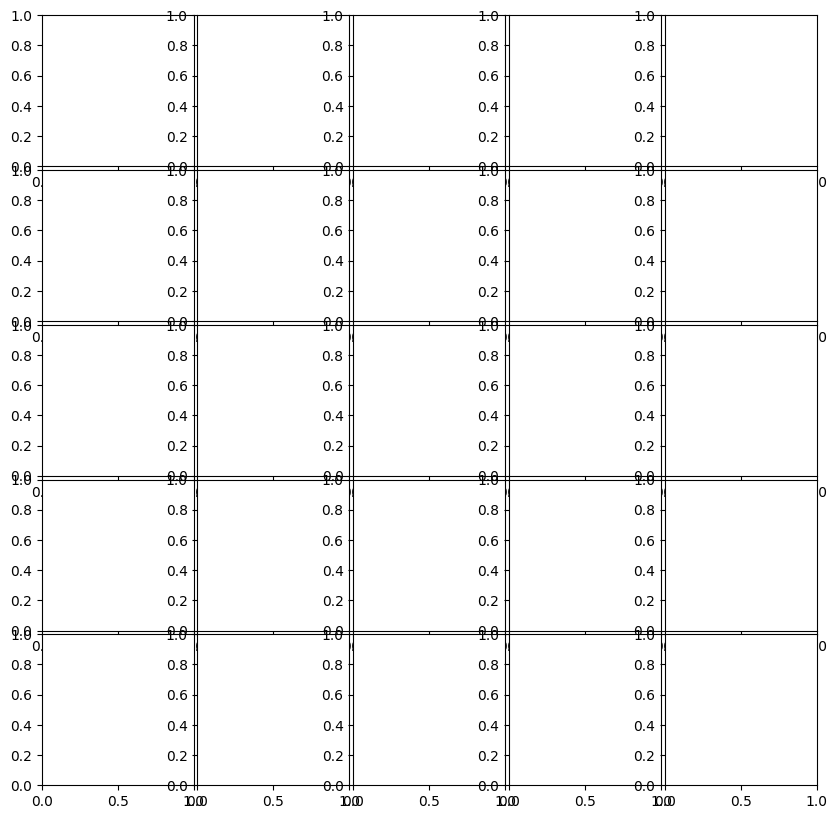

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
from numpy import asarray
from numpy import savetxt

# Plotting library
from matplotlib import pyplot
import matplotlib.image as mpimg
import matplotlib.cm as cm 

# Optimization module in scipy
from scipy import optimize
from scipy import misc

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils
# importing os module 
import os 

from skimage import color
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean

# tells matplotlib to embed plots within the notebook
%matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x))
    
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    # You need to return the following variables correctly 
    W = np.zeros((L_out, 1 + L_in))
    # ====================== YOUR CODE HERE ======================
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    # ============================================================
    return W


def sigmoidGradient(z):
    g = np.zeros(z.shape)
    # ====================== YOUR CODE HERE ======================
    g = sigmoid(z) * (1-  sigmoid(z))
    # =============================================================
    return g

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=0.0):

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = y.size
         
    # You need to return the following variables correctly 
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    # ====================== YOUR CODE HERE ======================
    a1 = np.concatenate([np.ones((m,1)),X],axis = 1)
    a2 =  sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0],1)),a2],axis=1)
    a3 =  sigmoid(a2.dot(Theta2.T))

    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix].astype(int)

    temp1 = Theta1
    temp2 = Theta2

    reg = (lambda_ / (2*m)) * (np.sum(np.square(temp1[:,1:])) + np.sum(np.square(temp2[:,1:])))
    J = (-1/m) * np.sum((np.log(a3) * y_matrix) + np.log(1-a3) * (1-y_matrix)) + reg
    
    delta_3 = a3 - y_matrix
    delta_2 = delta_3.dot(Theta2)[:,1:] * sigmoidGradient(a1.dot(Theta1.T))

    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)

    Theta1_grad = (1/m) * Delta1
    Theta1_grad[:,1:] = Theta1_grad[:,1:] + (lambda_ / m) * Theta1[:,1:]

    Theta2_grad = (1/m) * Delta2
    Theta2_grad[:,1:] = Theta2_grad[:,1:] + (lambda_ / m) * Theta2[:,1:]
    
    # ================================================================
    # Unroll gradients
    # grad = np.concatenate([Theta1_grad.ravel(order=order), Theta2_grad.ravel(order=order)])
    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

    return J, grad



X_size = 14284 #2046 validation 14284 train 2039 valid which are 691200 and 14284 which are 691200 
Gray_size = 57600  #230400

def loadData(directory_path):
    labels = np.zeros((X_size))
    gray_arrays = np.zeros((X_size,Gray_size))
    directory_path
    ext = ('.jpg')
    i = 0
    j = 0
    for directory in os.listdir(directory_path):
        newPath = directory_path + '\\' + directory
        for file in os.listdir(newPath):
            if file.endswith(ext):
                path = newPath + '\\' + file

                img = io.imread(path)
                if(img.size == 691200):
                    imgGray = color.rgb2gray(img)
                    res_img = rescale(imgGray, 0.5, anti_aliasing=False)
                    imgn = np.reshape(res_img,(1,Gray_size),order='F')
                    gray_arrays[i] = np.float32(imgn)
                    type = directory
                    match type:
                        case 'd4':
                            labels[i]=int(0)
                        case 'd6':
                            labels[i]=int(1)
                        case 'd8':
                            labels[i]=int(2)
                        case 'd10':
                            labels[i]=int(3)
                        case 'd12':
                            labels[i]=int(4)
                        case 'd20':
                            labels[i]=int(5) 
                else:
                    continue

                i = i + 1   
                j=j+1                                                                                                                
            else:
                continue
    i = 0

    return gray_arrays, labels,j

def main():
    gray_arrays, labels,j = loadData(r"C:\Users\maart\Documents\IIW\Machine\Taak\Data\dice-d4-d6-d8-d10-d12-d20\dice\train")
    X_t = np.concatenate([np.ones((X_size, 1)), gray_arrays], axis=1)
    # print(X_t)

    labels_int = labels.astype(int)
    X = X_t
    y_t = labels_int
    y = labels_int
    print(y)
    # Setup the parameters you will use for this exercise
    input_layer_size  = 57601  # Input Images of Digits
    hidden_layer_size = 25   # 25 hidden units
    num_labels = 6         # 10 labels, from 0 to 9

    print('Initializing Neural Network Parameters ...')
    initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
    initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

    # Unroll parameters
    initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)
    nn_params = initial_nn_params


    # utils.checkNNGradients(nnCostFunction)

    #  Check gradients by running checkNNGradients
    lambda_ = 0.01
    # utils.checkNNGradients(nnCostFunction, lambda_)

    # Also output the costFunction debugging values
    debug_J, _  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

    print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' % (lambda_, debug_J))
    print('(for lambda = 3, this value should be about 0.576051)')

        #  After you have completed the assignment, change the maxiter to a larger
    #  value to see how more training helps.
    options= {'maxiter': 100}

    #  You should also try different values of lambda
    lambda_ = 0.01

    # Create "short hand" for the cost function to be minimized
    costFunction = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

    # Now, costFunction is a function that takes in only one argument
    # (the neural network parameters)
    res = optimize.minimize(costFunction, initial_nn_params, jac=True, method='TNC', options=options)

    # get the solution of the optimization
    nn_params = res.x
            
    # Obtain Theta1 and Theta2 back from nn_params
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))
    
    pred = utils.predict(Theta1, Theta2, X)
    print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

main()